# Nasza pierwsza sieć neuronowa

<img src="network.png" />

In [1]:
# import bibliotek
import math
import numpy as np
%matplotlib inline 
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import Image

# Kluczowe elementy sieci neuronowej

- wielkosc sieci neuronowej
    - input
    - ilosc warstw
    - ilosc neuronow w warstwach
    - output
- wagi
- szybkosc uczenia sie
- funkcja aktywacyjna

## Wielkość sieci neuronowej
- Warstwa wejściowa (input) = nasze dane
    - ile cech w naszych danych (features) tyle neuronów 
- Warstwa wyjściowa (otput, odpowiedżsieci) 
    - zależy od tego ilu odpowiedzi się spodziewamy
- Warstwa/warstwy ukryte
    - metoda prób i błędów

## Jak działa sztuczny neuron?

<img src='jak_dziala_sztuczny_neuron.png' />

## Najpopularniejsze funkcje aktywacyjne

sigmoid: f(x) = 1/e**(-x)
<img src='sigmoid.png' />

reLU:    f(x) = x*(x>0)
<img src='relu.png' />


In [21]:
def relu(x):
    return x * (x > 0)

def sigmoid(x):
    return 1/(1+np.exp(-x))

In [22]:
#relu(-2)

[-5.         -4.7755102  -4.55102041 -4.32653061 -4.10204082 -3.87755102
 -3.65306122 -3.42857143 -3.20408163 -2.97959184 -2.75510204 -2.53061224
 -2.30612245 -2.08163265 -1.85714286 -1.63265306 -1.40816327 -1.18367347
 -0.95918367 -0.73469388 -0.51020408 -0.28571429 -0.06122449  0.16326531
  0.3877551   0.6122449   0.83673469  1.06122449  1.28571429  1.51020408
  1.73469388  1.95918367  2.18367347  2.40816327  2.63265306  2.85714286
  3.08163265  3.30612245  3.53061224  3.75510204  3.97959184  4.20408163
  4.42857143  4.65306122  4.87755102  5.10204082  5.32653061  5.55102041
  5.7755102   6.        ]


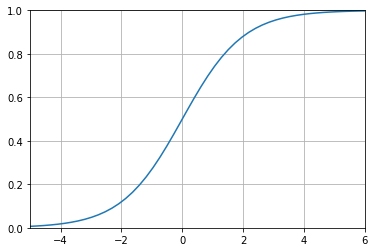

In [34]:
#x = np.arange(-10, 11)
x = np.linspace(-5, 6)

print(x)
   
plt.plot(x, sigmoid(x))

plt.xlim(-5, 6)
plt.ylim(0, 1)
plt.grid(True)

plt.show()

In [36]:
@interact(x=widgets.IntSlider(min=-9,max=10,step=1,value=0))
def aktywacja(x):
    print(f'sigmoid: {sigmoid(x)}')

interactive(children=(IntSlider(value=0, description='x', max=10, min=-9), Output()), _dom_classes=('widget-in…

<img src="network.png" />

## Dane wejściowe

In [6]:
x = 1
y = 0

### Wagi dla naszej sieci

In [7]:
# wstępne/losowe wagi dla naszej sieci
waga_11 = 0.2
waga_12 = -0.1
waga_21 = 0.3
waga_22 = 0.5
waga_13 = -0.2
waga_23 = 0.4

### Definiujemy działanie neuronów w warstwie ukrytej

In [37]:
#dodac math formula

def neuron_H1(x, y):
    inputs = (x * waga_11) + (y * waga_21)
    output = sigmoid(inputs)
    return output  

In [38]:
neuron_H1(x, y)

array([ 0.97626919,  0.9720796 ,  0.96717522,  0.96144353,  0.95475781,
        0.94697673,  0.93794437,  0.9274912 ,  0.91543596,  0.90158909,
        0.88575783,  0.86775337,  0.84740028,  0.82454813,  0.7990852 ,
        0.77095342,  0.74016349,  0.70680862,  0.6710748 ,  0.63324565,
        0.59369993,  0.55290076,  0.5113765 ,  0.46969463,  0.42843128,
        0.38813975,  0.34932159,  0.31240348,  0.27772174,  0.24551546,
        0.21592747,  0.18901195,  0.16474652,  0.14304682,  0.12378174,
        0.1067879 ,  0.09188247,  0.07887382,  0.06756989,  0.05778437,
        0.049341  ,  0.04207628,  0.03584085,  0.03050004,  0.02593369,
        0.02203546,  0.01871193,  0.01588154,  0.0134734 ,  0.01142617])

In [39]:
def neuron_H2(x, y):
    inputs = (x * waga_21) + (y * waga_22)
    output = sigmoid(inputs)
    return output 

### Odpowiedź sieci

In [40]:
def odpowiedz(x, y):
    neuron1 = neuron_H1(x, y)
    neuron2 = neuron_H2(x, y)  

    return neuron1 * waga_13 + neuron2 * waga_23

In [41]:
odpowiedz(1, 0)

-0.11014927385459039

## Przetestujmy naszą sieć

In [42]:
dane = ['0, 0', '0, 1', '1, 0', '1, 1']

@interact(string=dane)
def odp(string):
    
    a, b = string.split(',')
    x = int(a)
    y = int(b)
    return f'input: {string} odpowiedz sieci: {neuron_H1(x, y)*waga_13 + neuron_H2(x, y)*waga_23}'

interactive(children=(Dropdown(description='string', options=('0, 0', '0, 1', '1, 0', '1, 1'), value='0, 0'), …

## Zmiana wag

In [17]:
# Sieć bardzo się stara wypaść lepiej (losowa zmiana wag)

def update_wag():
    global waga_11
    global waga_12 
    global waga_21 
    global waga_22 
    global waga_13 
    global waga_23 
    waga_11 += np.random.rand() * np.random.choice([1, -1]) # monożymy razy 1 lunb -1 , zeby uzyskac numery po obu stronach zera
    waga_12 += np.random.rand() * np.random.choice([1, -1])
    waga_21 += np.random.rand() * np.random.choice([1, -1])
    waga_22 += np.random.rand() * np.random.choice([1, -1])
    waga_13 += np.random.rand() * np.random.choice([1, -1])
    waga_23 += np.random.rand() * np.random.choice([1, -1])
    

In [18]:
def nauka_bez_sensu(x, y, epoki):
    for epoka in range(epoki):
        print(f'odpowiedz nr.{epoka}: {odpowiedz(x, y)}')
        update_wag()
    return f'odpowiedz końcowa: {odpowiedz(x, y)}'

In [19]:
nauka_bez_sensu(0, 1, 5)

odpowiedz nr.0: 0.14
odpowiedz nr.1: 0.48703128984020716
odpowiedz nr.2: 1.6137204006726977
odpowiedz nr.3: 1.2662551680045369
odpowiedz nr.4: 0.48616421608568794


'odpowiedz końcowa: 0.0'